# Cadeias logísticas (Supply Chain)
Transporte de produtos entre fábricas, armazéns e lojas. Aplicar fluxo em redes com custo (mínimo custo de fluxo).

In [238]:
# import kagglehub
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [239]:
new_df = pd.read_csv('dataco.csv', encoding='latin-1')
new_df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product Status shipping date (DateOrders)   Shipping Mode  
0              0             2/3/2018 22:56  Standard Class  
1              0            1/18/2018 12:27  Standard Class  
2              0            1/17/2018 12:06  Standard Class  
3              0            1/16/2018 11:45  Standard Class  
4              0            1/15/2018 11:24  Standard Class  

[5 rows x 53 columns]

In [240]:
# Descrição do data frame
desc_df = pd.read_csv('descdataco.csv', encoding='latin-1')
desc_df

FIELDS  \
0                            Type   
1   Days for shipping (real)        
2   Days for shipment (scheduled)   
3               Benefit per order   
4              Sales per customer   
5                 Delivery Status   
6   Late_delivery_risk              
7                     Category Id   
8                   Category Name   
9                   Customer City   
10               Customer Country   
11                 Customer Email   
12                 Customer Fname   
13                    Customer Id   
14                 Customer Lname   
15              Customer Password   
16               Customer Segment   
17                 Customer State   
18                Customer Street   
19               Customer Zipcode   
20                  Department Id   
21                Department Name   
22                       Latitude   
23                      Longitude   
24                         Market   
25                     Order City   
26                  Order Country   
27              Order Customer Id   
28        order date (DateOrders)   
29                       Order Id   
30         Order Item Cardprod Id   
31            Order Item Discount   
32  Order Item Discount Rate        
33                  Order Item Id   
34  Order Item Product Price        
35        Order Item Profit Ratio   
36            Order Item Quantity   
37                          Sales   
38             Order Item Total     
39         Order Profit Per Order   
40                   Order Region   
41                    Order State   
42                   Order Status   
43                Product Card Id   
44            Product Category Id   
45            Product Description   
46                  Product Image   
47                   Product Name   
48                  Product Price   
49                 Product Status   
50  Shipping date (DateOrders)      
51                  Shipping Mode   

                                          DESCRIPTION  
0                         :  Type of transaction made  
1    :  Actual shipping days of the purchased product  
2   :  Days of scheduled delivery of the purchased...  
3                        :  Earnings per order placed  
4       :  Total sales per customer made per customer  
5   :  Delivery status of orders: Advance shipping...  
6   :  Categorical variable that indicates if send...  
7                            :  Product category code  
8              :  Description of the product category  
9        :  City where the customer made the purchase  
10    :  Country where the customer made the purchase  
11                                :  Customer's email  
12                                   :  Customer name  
13                                     :  Customer ID  
14                               :  Customer lastname  
15                             :  Masked customer key  
16  :  Types of Customers: Consumer , Corporate , ...  
17  :  State to which the store where the purchase...  
18  :  Street to which the store where the purchas...  
19                                :  Customer Zipcode  
20                        :  Department code of store  
21                        :  Department name of store  
22     :  Latitude corresponding to location of store  
23    :  Longitude corresponding to location of store  
24  :  Market to where the order is delivered : Af...  
25                   :  Destination city of the order  
26                :  Destination country of the order  
27                             :  Customer order code  
28                 :  Date on which the order is made  
29                                      :  Order code  
30  :  Product code generated through the RFID reader  
31                       :  Order item discount value  
32                  :  Order item discount percentage  
33                                 :  Order item code  
34              :  Price of products without discount  
35                         :  Order Item Profit R

In [241]:
new_df = new_df.drop(['Product Image', 'Product Description', 'Order Zipcode', 'Customer Password', 'Customer Email'],axis=1)
new_df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

     Order Region      Order State     Order Status Product Card Id  \
0  Southeast Asia  Java Occidental         COMPLETE            1360   
1      South Asia         Rajastán          PENDING            1360   
2      South Asia         Rajastán           CLOSED            1360   
3         Oceania       Queensland         COMPLETE            1360   
4         Oceania       Queensland  PENDING_PAYMENT            1360   

  Product Category Id  Product Name Product Price  Product Status  \
0                  73  Smart watch         327.75               0   
1                  73  Smart watch         327.75               0   
2                  73  Smart watch         327.75               0   
3                  73  Smart watch         327.75               0   
4                  73  Smart watch         327.75               0   

   shipping date (DateOrders)   Shipping Mode  
0              2/3/2018 22:56  Standard Class  
1             1/18/2018 12:27  Standard Class  
2             1/17/2018 12:06  Standard Class  
3             1/16/2018 11:45  Standard Class  
4             1/15/2018 11:24  Standard Class  

[5 rows x 48 columns]

In [242]:
new_df['order date (DateOrders)']

0         1/31/2018 22:56
1         1/13/2018 12:27
2         1/13/2018 12:06
3         1/13/2018 11:45
4         1/13/2018 11:24
               ...       
180514     1/16/2016 3:40
180515     1/16/2016 1:34
180516    1/15/2016 21:00
180517    1/15/2016 20:18
180518    1/15/2016 18:54
Name: order date (DateOrders), Length: 180519, dtype: object

Os dados sobre o pedido está na forma de string "data hora", então criamos uma nova coluna no Data Frame contendo apenas a data

In [243]:
# A nova data é do tipo, (Ano-Mes-Dia)
new_df['order date (DateOrders)'] = pd.to_datetime(new_df['order date (DateOrders)'])
new_df['Date'] = new_df['order date (DateOrders)'].dt.date
new_df['Date']

0         2018-01-31
1         2018-01-13
2         2018-01-13
3         2018-01-13
4         2018-01-13
             ...    
180514    2016-01-16
180515    2016-01-16
180516    2016-01-15
180517    2016-01-15
180518    2016-01-15
Name: Date, Length: 180519, dtype: object

Iniciamos filtrando a data para saber todas operações que foram realizadas naquele dia.

In [244]:
same_date = new_df[new_df['Date'] == pd.to_datetime('2016-1-20').date()]
same_date.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
2206  DEBIT                         5                              4   
2274  DEBIT                         6                              4   
2321  DEBIT                         5                              4   
4300  DEBIT                         4                              4   
4315  DEBIT                         4                              4   

      Benefit per order  Sales per customer   Delivery Status  \
2206          22.900000           49.790001     Late delivery   
2274          19.200001           39.990002     Late delivery   
2321          12.520000           40.000000     Late delivery   
4300          22.500000           44.990002  Shipping on time   
4315         -37.500000          299.980011  Shipping on time   

      Late_delivery_risk  Category Id     Category Name Customer City  ...  \
2206                   1           17            Cleats        Quincy  ...   
2274                   1           29     Shop By Sport    Long Beach  ...   
2321                   1           24   Women's Apparel       Hialeah  ...   
4300                   0           17            Cleats       Mchenry  ...   
4315                   0           43  Camping & Hiking       Mchenry  ...   

             Order State Order Status  Product Card Id Product Category Id  \
2206               Hyogo     COMPLETE              365                  17   
2274             Yakarta     COMPLETE              627                  29   
2321          Chittagong     COMPLETE              502                  24   
4300  Ciudad Ho Chi Minh      ON_HOLD              365                  17   
4315  Ciudad Ho Chi Minh      ON_HOLD              957                  43   

                                       Product Name Product Price  \
2206               Perfect Fitness Perfect Rip Deck     59.990002   
2274  Under Armour Girls' Toddler Spine Surge Runni     39.990002   
2321           Nike Men's Dri-FIT Victory Golf Polo     50.000000   
4300               Perfect Fitness Perfect Rip Deck     59.990002   
4315  Diamondback Women's Serene Classic Comfort Bi    299.980011   

     Product Status  shipping date (DateOrders)   Shipping Mode        Date  
2206              0             1/25/2016 20:07  Standard Class  2016-01-20  
2274              0              1/26/2016 4:43  Standard Class  2016-01-20  
2321              0             1/25/2016 21:53  Standard Class  2016-01-20  
4300              0             1/24/2016 14:31  Standard Class  2016-01-20  
4315              0             1/24/2016 14:31  Standard Class  2016-01-20  

[5 rows x 49 columns]

In [245]:
# São exibidos os cinco primeiros na lista
A = list(zip(same_date['Customer Country'], same_date['Order Country']))
A[:5]

[('EE. UU.', 'Japón'),
 ('EE. UU.', 'Indonesia'),
 ('EE. UU.', 'Bangladés'),
 ('EE. UU.', 'Vietnam'),
 ('EE. UU.', 'Vietnam')]

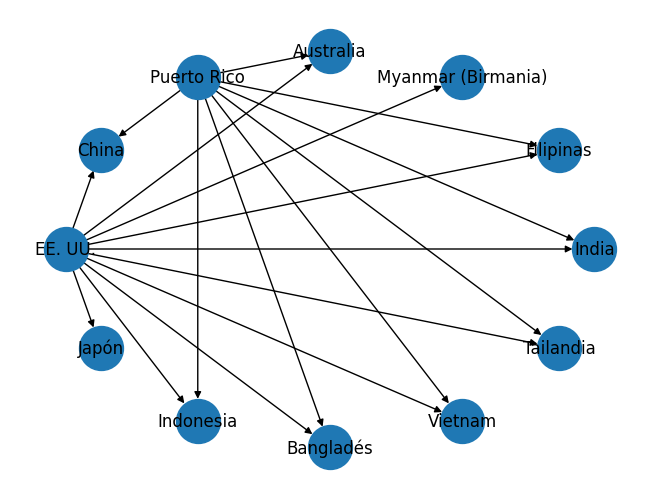

In [246]:
G1 = nx.DiGraph()
G1.add_edges_from(A)

pos1 = nx.planar_layout(G1)
nx.draw_shell(G1, with_labels=True, node_size=1000)
plt.show()

In [247]:
# Ao invés de utilizar o nome do país vamos utilizar um valor numérico
countries = pd.unique(same_date[['Customer Country', 'Order Country']].values.ravel())
mapping = {pais: i+1 for i, pais in enumerate(countries)}
A_num = list(zip(
    same_date['Customer Country'].map(mapping),
    same_date['Order Country'].map(mapping)
))
A_num[:5]

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 5)]

In [248]:
df_mapping = pd.DataFrame(list(mapping.items()), columns=['País', 'Código'])
df_mapping

País  Código
0              EE. UU.       1
1                Japón       2
2            Indonesia       3
3            Bangladés       4
4              Vietnam       5
5            Tailandia       6
6                India       7
7            Filipinas       8
8   Myanmar (Birmania)       9
9            Australia      10
10         Puerto Rico      11
11               China      12

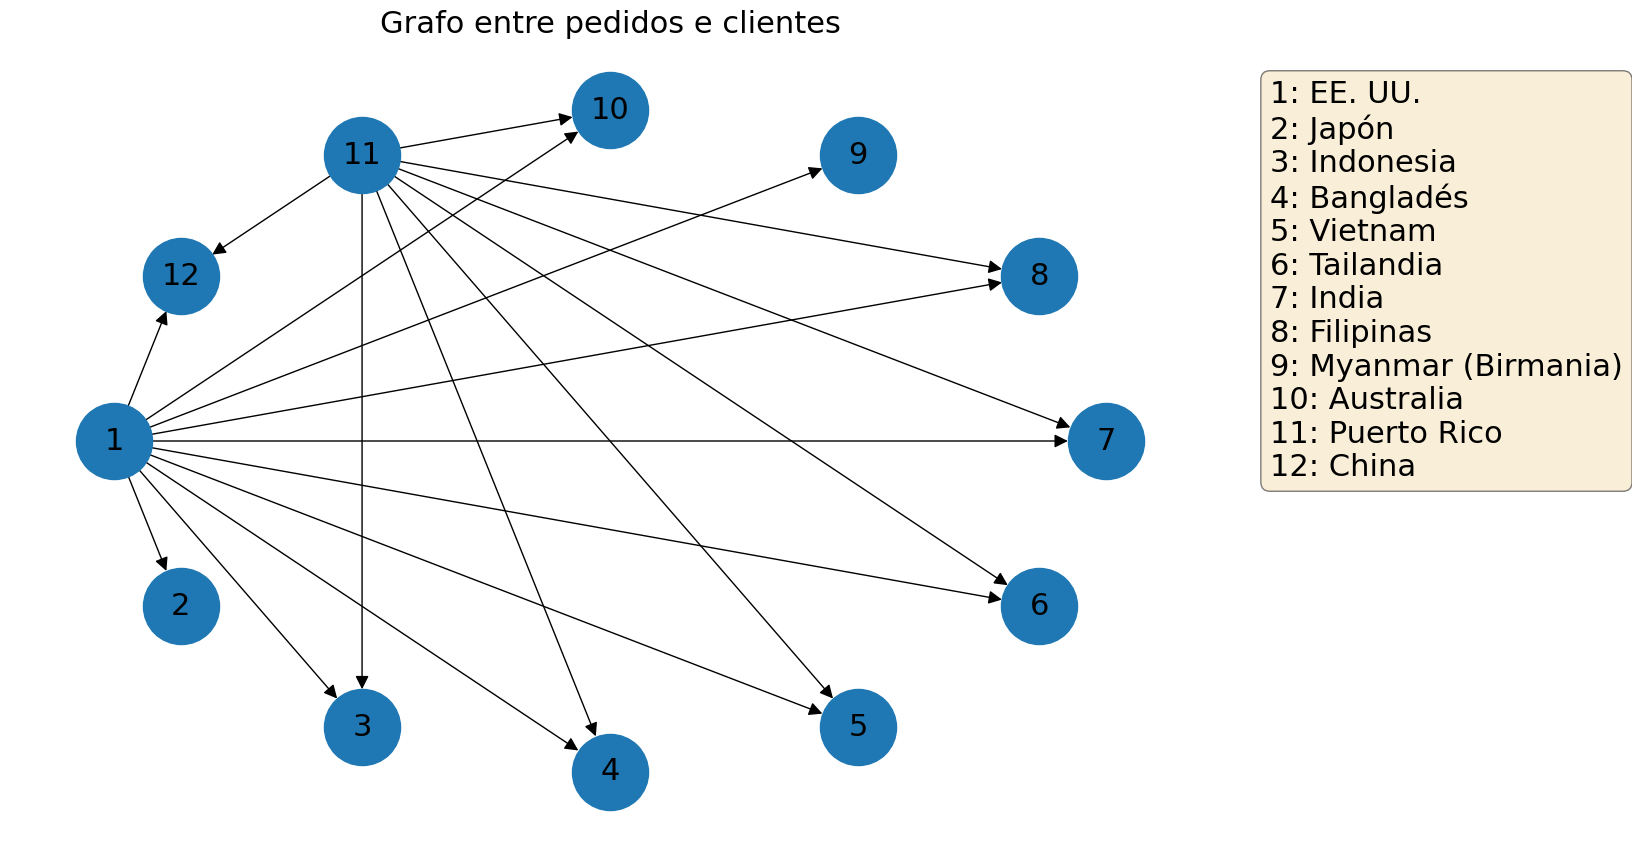

In [249]:
# G2 = nx.DiGraph()
G2 = nx.DiGraph()
G2.add_edges_from(A_num)
plt.figure(figsize=(12, 8))

pos2 = nx.planar_layout(G2)
nx.draw_shell(G2, with_labels=True, node_size=3000, font_size=22, arrowsize=20)


legend_text = "\n".join([f"{row['Código']}: {row['País']}" for _, row in df_mapping.sort_values('Código').iterrows()])
plt.text(1.05, 0.7, legend_text, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='center', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
plt.title("Grafo entre pedidos e clientes", fontsize=22)
# plt.savefig("grafo_pedidos_clientes2.png", dpi=400, bbox_inches='tight')
plt.show()

In [250]:
same_date.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Id', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (

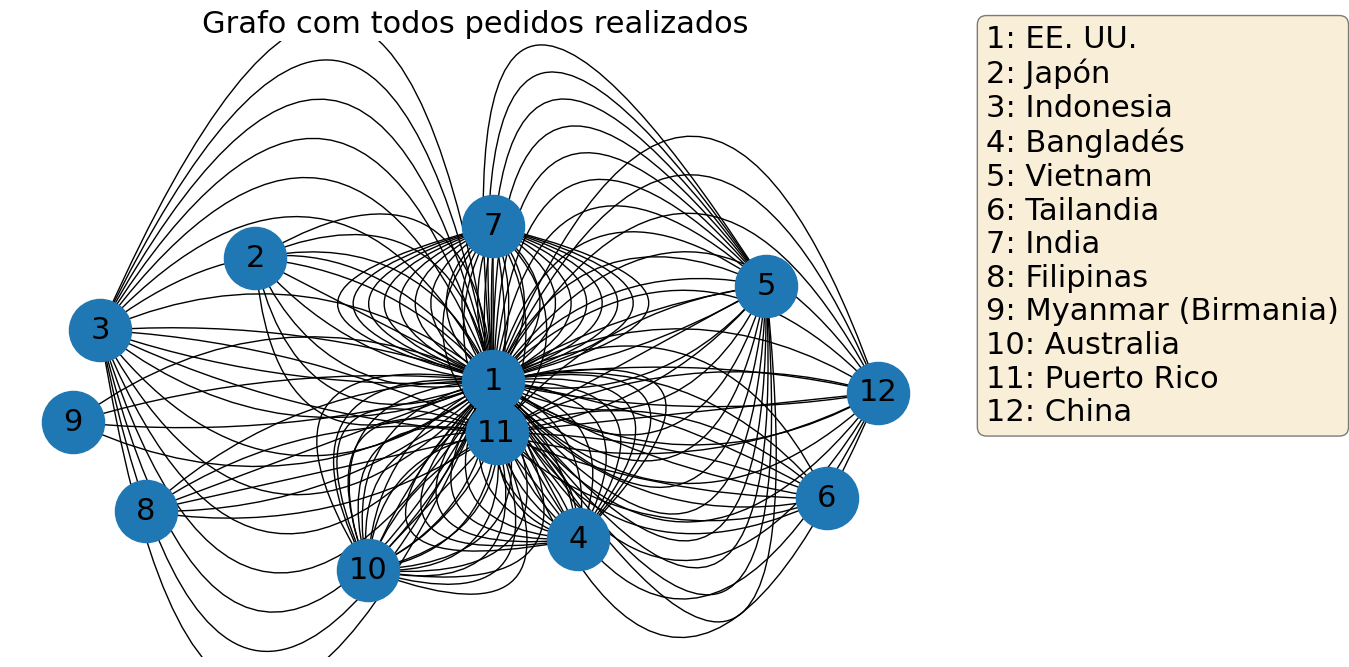

In [251]:
# É necessário sem multigrafo ao invés de um grafo direcionado.
G2 = nx.MultiDiGraph()
G2.add_edges_from(A_num)

pos2 = nx.spring_layout(G2, seed=85) # A estrutura é aleatória então fixamos uma através de seed.
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G2, pos2, node_size=2000)
nx.draw_networkx_labels(G2, pos2, font_size=22, )

from collections import defaultdict
edge_counts = defaultdict(int)
for u, v, _ in G2.edges(keys=True):
    edge_counts[(u, v)] += 1

drawn_edges = defaultdict(int)

for u, v, key in G2.edges(keys=True):
    count = edge_counts[(u, v)]
    index = drawn_edges[(u, v)]
    if count == 1:
        rad = 0.0 
    else:
        rad = (index - (count - 1) / 2) * 0.2
    nx.draw_networkx_edges(G2, pos2, edgelist=[(u, v)],
                           connectionstyle=f'arc3,rad={rad}', arrows=True, arrowsize=22)
    drawn_edges[(u, v)] += 1

legend_text = "\n".join([
    f"{row['Código']}: {row['País']}"
    for _, row in df_mapping.sort_values('Código').iterrows()
])
plt.text(1.05, 0.7, legend_text, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='center', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.title("Grafo com todos pedidos realizados", fontsize=22)
plt.axis('off')
# plt.savefig("grafo_todos_pedidos.png", dpi=400, bbox_inches='tight')
plt.show()


In [252]:
# Filtragem dos estados
usa_df = same_date[same_date['Customer Country'] == 'EE. UU.']
puert_df = same_date[same_date['Customer Country'] == 'Puerto Rico']
usa_df['Customer State'].to_frame().head()

Customer State
2206             MA
2274             CA
2321             FL
4300             IL
4315             IL

In [253]:
new_A = A_num
for i in usa_df['Customer State']:
    new_A.append((i, 1))
    
new_A[-5:]

[('AZ', 1), ('NY', 1), ('OH', 1), ('FL', 1), ('CA', 1)]

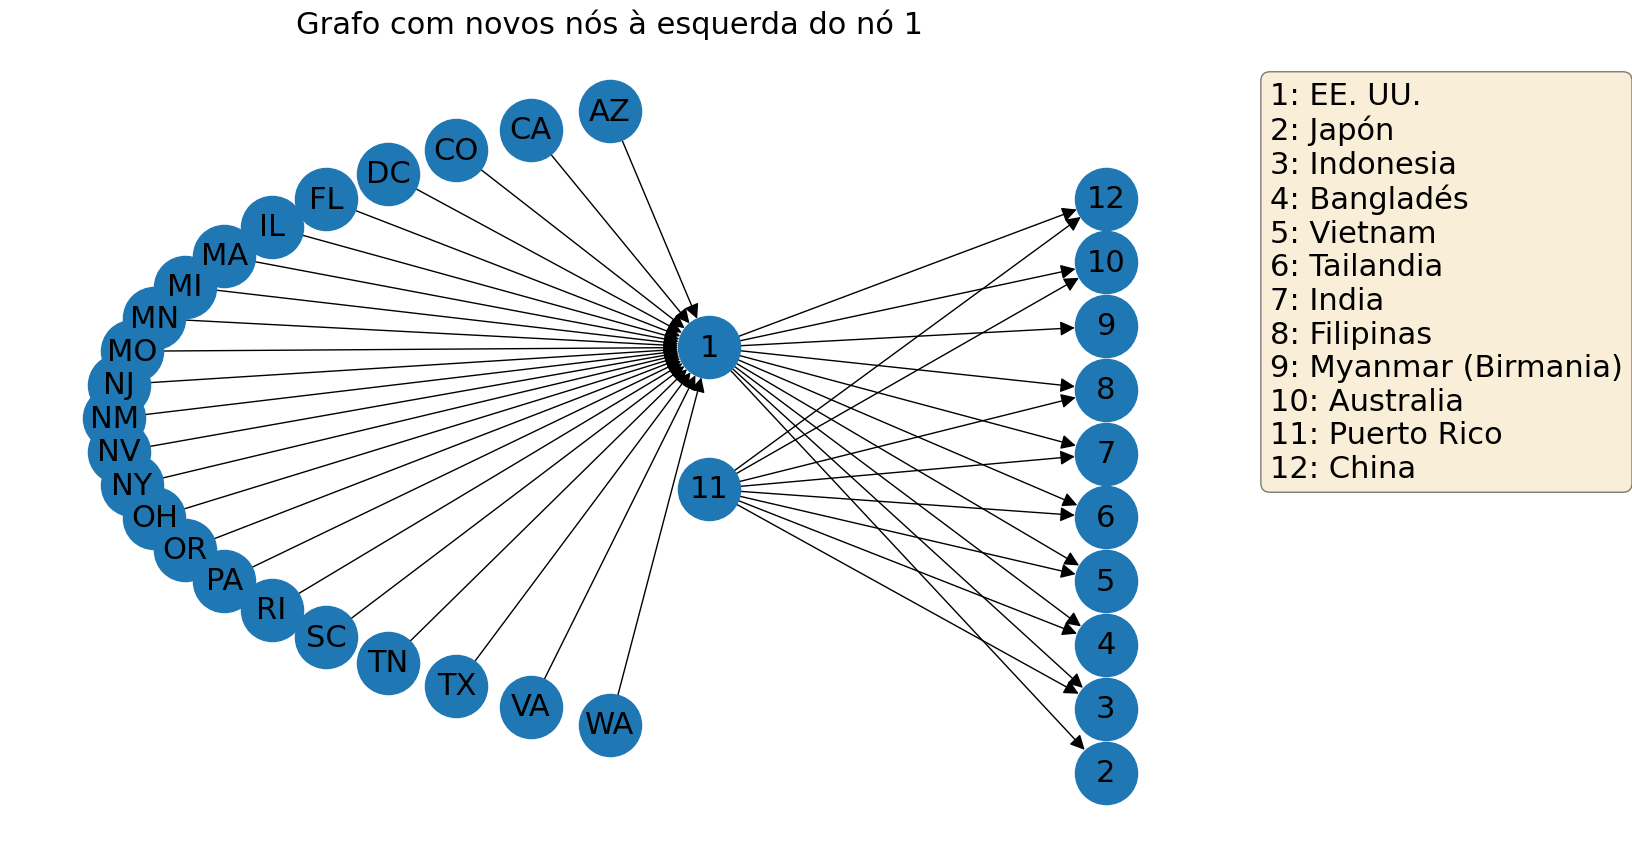

In [254]:
G3 = nx.DiGraph()
G3.add_edges_from(new_A)
plt.figure(figsize=(12, 8))

nodes = set(G3.nodes())
left_nodes = {u for u, v in new_A if v == 1}
right_nodes = {v for u, v in new_A if u == 1}  
center_node = 1
others = nodes - left_nodes - right_nodes - {center_node}

pos = {}
pos[center_node] = (0, 6)

start_angle = 2 * np.pi / 3
end_angle = 4 * np.pi / 3
n_left = len(left_nodes)
radius = 5

for i, node in enumerate(sorted(left_nodes)):
    angle = start_angle + i * (end_angle - start_angle) / (n_left - 1 if n_left > 1 else 1)
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    pos[node] = (x+2, y+5)


for i, node in enumerate(sorted(right_nodes)):
    pos[node] = (2, i * 0.9)

for i, node in enumerate(sorted(others)):
    pos[node] = (0, 4 - i)


nx.draw(G3, pos, with_labels=True, node_size=2000, arrows=True, arrowsize=22, font_size=22)

legend_text = "\n".join([f"{row['Código']}: {row['País']}" for _, row in df_mapping.sort_values('Código').iterrows()])
plt.text(1.05, 0.7, legend_text, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='center', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.title("Grafo com novos nós à esquerda do nó 1", fontsize=22)
plt.axis("off")
# plt.savefig("grafo_estados.png", dpi=400, bbox_inches='tight')
plt.show()

In [255]:
# Ao invés de utilizar o nome do país vamos utilizar um valor numérico
us_cities = pd.unique(same_date[['Customer Country', 'Order Country']].values.ravel())
us_mapping = {city: i+1 for i, city in enumerate(us_cities)}
A_num = list(zip(
    same_date['Customer Country'].map(us_mapping),
    same_date['Order Country'].map(us_mapping)
))
A_num[:5]

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 5)]

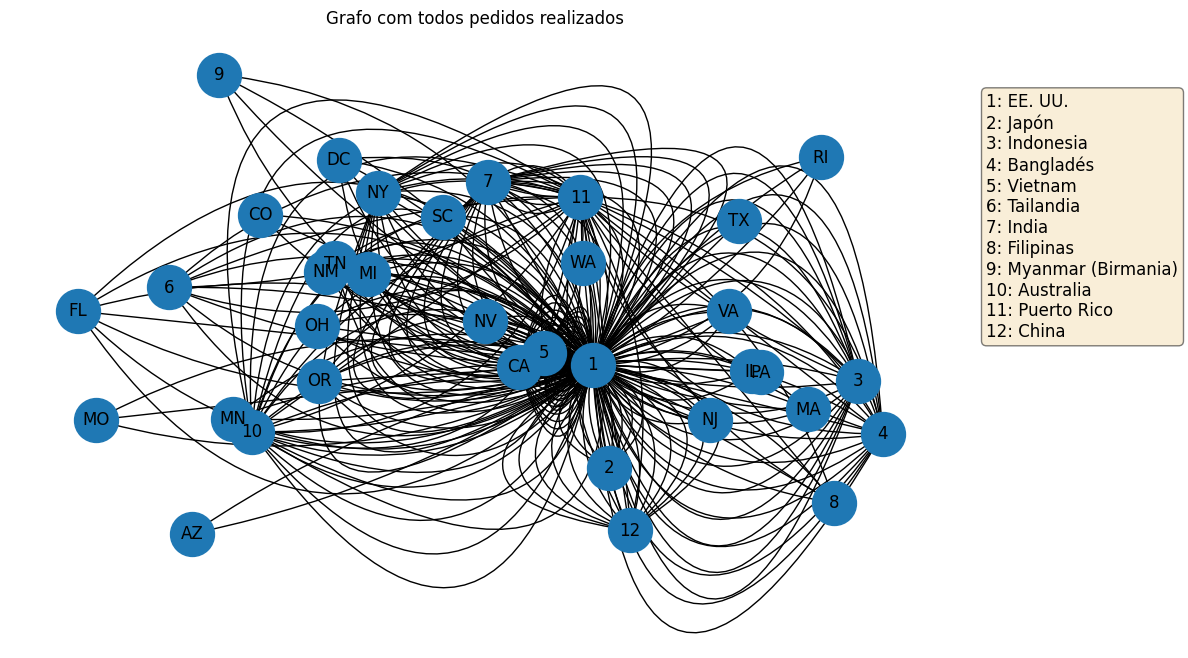

In [256]:
# É necessário sem multigrafo ao invés de um grafo direcionado.
G4 = nx.MultiDiGraph()
G4.add_edges_from(new_A)

pos2 = nx.random_layout(G4, seed=30) # A estrutura é aleatória então fixamos uma através de seed.
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G4, pos2, node_size=1000)
nx.draw_networkx_labels(G4, pos2)

from collections import defaultdict
edge_counts = defaultdict(int)
for u, v, _ in G4.edges(keys=True):
    edge_counts[(u, v)] += 1

drawn_edges = defaultdict(int)

for u, v, key in G4.edges(keys=True):
    count = edge_counts[(u, v)]
    index = drawn_edges[(u, v)]
    if count == 1:
        rad = 0.0 
    else:
        rad = (index - (count - 1) / 2) * 0.2
    nx.draw_networkx_edges(G4, pos2, edgelist=[(u, v)],
                           connectionstyle=f'arc3,rad={rad}', arrows=True)
    drawn_edges[(u, v)] += 1

legend_text = "\n".join([
    f"{row['Código']}: {row['País']}"
    for _, row in df_mapping.sort_values('Código').iterrows()
])
plt.text(1.05, 0.7, legend_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='center', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.title("Grafo com todos pedidos realizados")
plt.axis('off')
plt.show()


In [257]:
A = list(zip(usa_df['Customer City'], same_date['Customer State']))
A[:5]

[('Quincy', 'MA'),
 ('Long Beach', 'CA'),
 ('Hialeah', 'FL'),
 ('Mchenry', 'IL'),
 ('Mchenry', 'IL')]

In [258]:
# Ao invés de utilizar o nome do país vamos utilizar um valor numérico
city_state = pd.unique(usa_df[['Customer City', 'Order State']].values.ravel())
mapping_city = {city: 'C' + str(i+1) for i, city in enumerate(city_state)}
A_us_city = list(zip(
    usa_df['Customer City'].map(mapping_city),
    same_date['Customer State']
))
A_us_city[:5]

[('C1', 'MA'), ('C3', 'CA'), ('C5', 'FL'), ('C7', 'IL'), ('C7', 'IL')]

In [259]:
df_cities = pd.DataFrame(list(mapping_city.items()), columns=['Cidade', 'Código'])
df_cities.head()

Cidade Código
0      Quincy     C1
1       Hyogo     C2
2  Long Beach     C3
3     Yakarta     C4
4     Hialeah     C5

In [260]:
complete_graph = new_A + A_us_city
complete_graph.append(('PR', 11))
complete_graph[-5:]

[('C33', 'OR'), ('C47', 'NY'), ('C41', 'PR'), ('C44', 'CA'), ('PR', 11)]

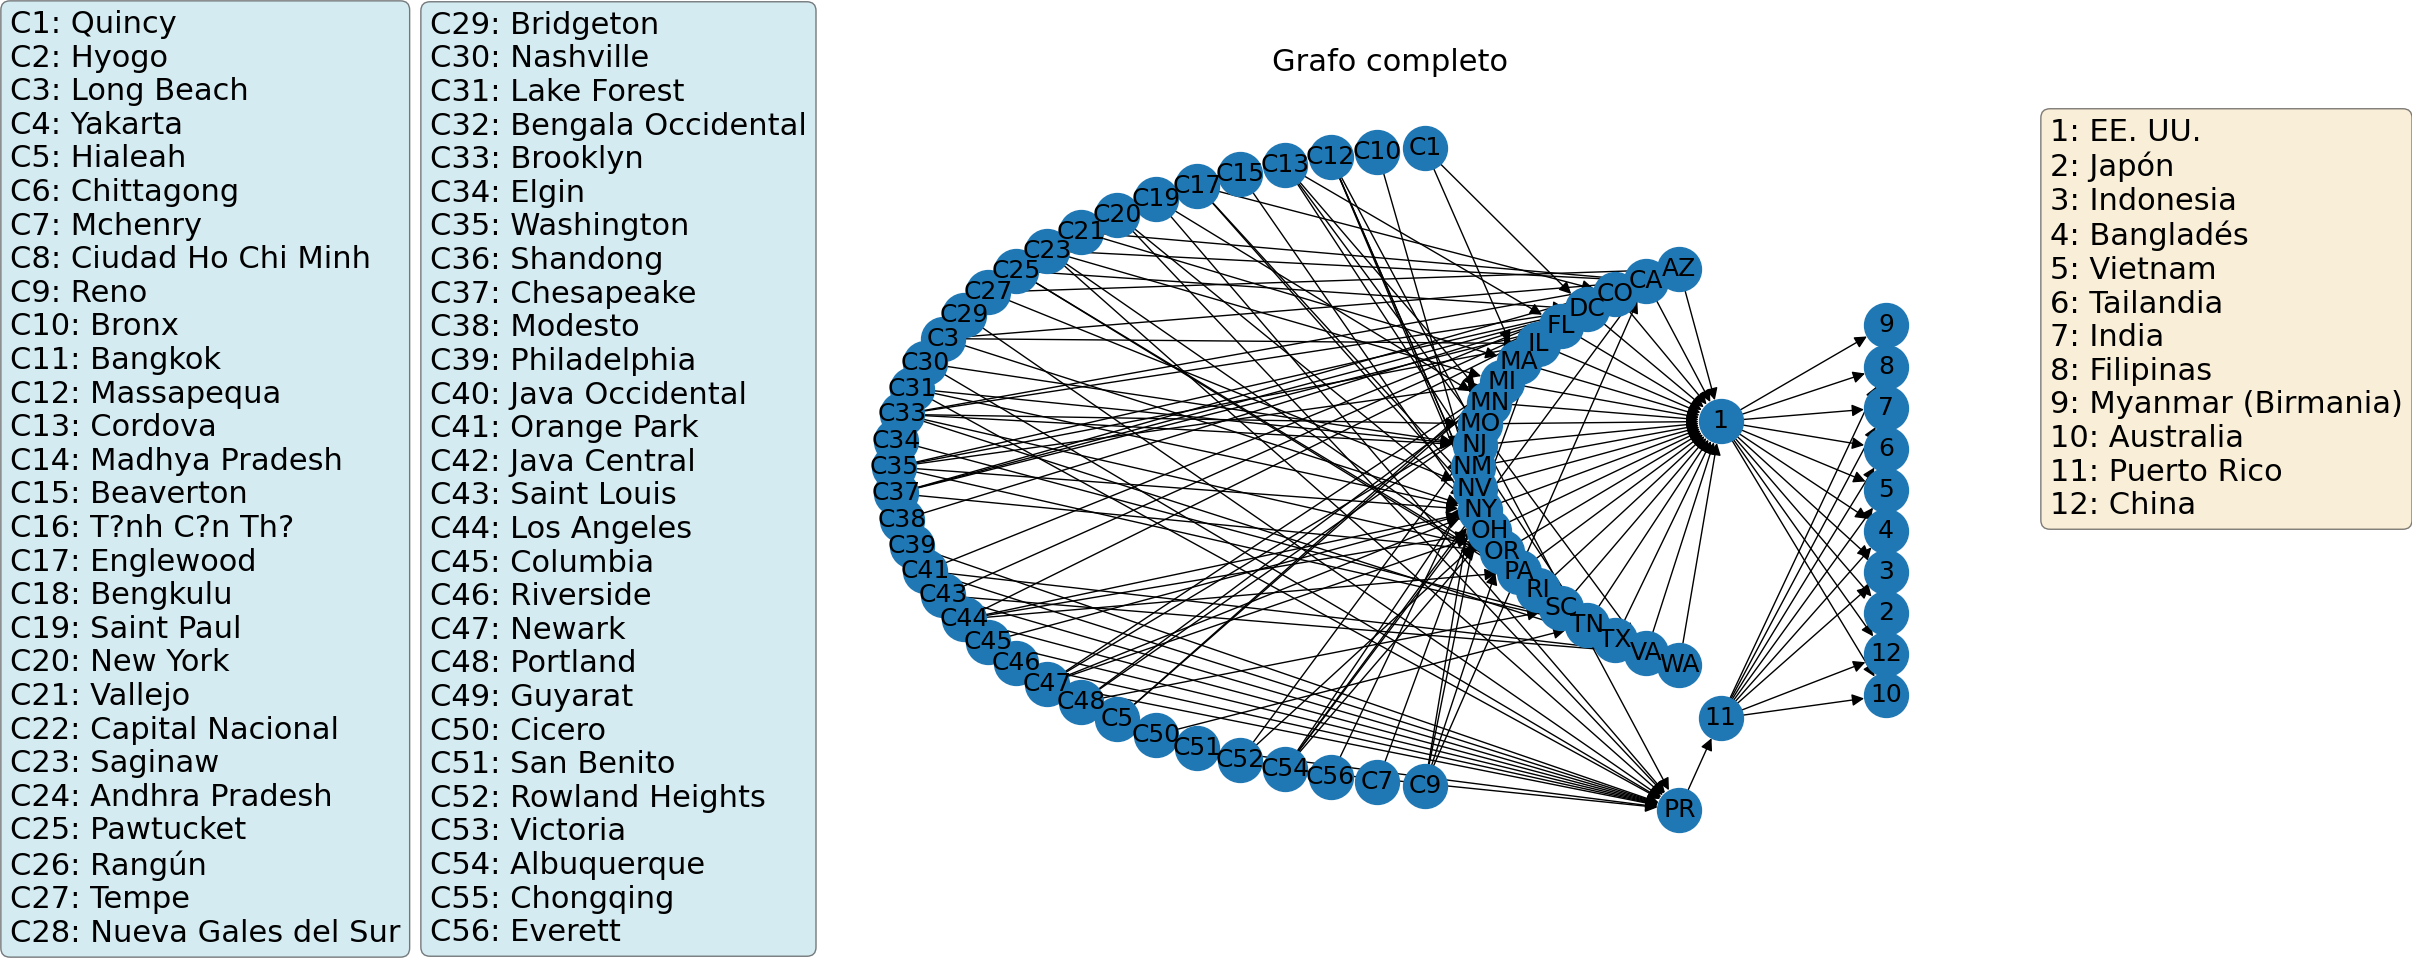

In [261]:
G3 = nx.DiGraph()
G3.add_edges_from(complete_graph)
plt.figure(figsize=(12, 8))

nodes = set(G3.nodes())
left_nodes = {u for u, v in complete_graph if v == 1}
right_nodes = {v for u, v in complete_graph if u == 1}  
center_node = 1
others = nodes - left_nodes - right_nodes - {center_node}

pos = {}
pos[center_node] = (0, 6)

start_angle = 2 * np.pi / 3
end_angle = 4 * np.pi / 3
n_left = len(left_nodes)
radius = 5

for i, node in enumerate(sorted(left_nodes, key=str)):
    angle = start_angle + i * (end_angle - start_angle) / (n_left - 1 if n_left > 1 else 1)
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)
    pos[node] = (x+2, y+5)


for i, node in enumerate(sorted(right_nodes, key=str)):
    pos[node] = (2, i * 0.9)
        
n_cities = len(others)
radius = 7
start_angle = np.pi / 2
end_angle = 3 * np.pi / 2
for i, node in enumerate(sorted(others, key=str)):
    if node == 11:
        pos[node] = (0, -.5)
    elif node == 'PR':
        pos[node] = (-0.5, -2.5)
    else:
        angle = start_angle + i * (end_angle - start_angle) / (n_cities - 1 if n_cities > 1 else 1)
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        pos[node] = (x-3, y+5)

nx.draw(G3, pos, with_labels=True, node_size=1000, arrows=True, font_size=18, arrowsize=18)

legend_text = "\n".join([f"{row['Código']}: {row['País']}" for _, row in df_mapping.sort_values('Código').iterrows()])
plt.text(1.05, 0.7, legend_text, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='center', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

half = len(df_cities) // 2 + len(df_cities) % 2  
df_left = df_cities.iloc[:half]
df_right = df_cities.iloc[half:]

legend_cities_left = "\n".join([f"{row['Código']}: {row['Cidade']}" for _, row in df_left.iterrows()])
legend_cities_right = "\n".join([f"{row['Código']}: {row['Cidade']}" for _, row in df_right.iterrows()])

plt.text(-0.65, 0.5, legend_cities_left, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='center', bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.5))

plt.text(-0.3, 0.5, legend_cities_right, transform=plt.gca().transAxes, fontsize=22,
         verticalalignment='center', bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.5))

plt.title("Grafo completo", fontsize=22)
plt.axis("off")
# plt.savefig("grafo_completos.png", dpi=400, bbox_inches='tight')
plt.show()

In [262]:
same_date.iloc[:,30:40]

Order Item Discount Rate  Order Item Id  Order Item Product Price  \
2206                        0.17          65988                 59.990002   
2274                        0.00          65885                 39.990002   
2321                        0.20          66007                 50.000000   
4300                        0.25          65946                 59.990002   
4315                        0.00          65947                299.980011   
...                          ...            ...                       ...   
180444                      0.02          65916                399.980011   
180445                      0.03          65903                399.980011   
180446                      0.04          65894                399.980011   
180447                      0.05          65893                399.980011   
180448                      0.06          65874                399.980011   

        Order Item Profit Ratio  Order Item Quantity       Sales  \
2206                       0.46                    1   59.990002   
2274                       0.48                    1   39.990002   
2321                       0.31                    1   50.000000   
4300                       0.50                    1   59.990002   
4315                      -0.13                    1  299.980011   
...                         ...                  ...         ...   
180444                     0.08                    1  399.980011   
180445                     0.36                    1  399.980011   
180446                     0.31                    1  399.980011   
180447                     0.39                    1  399.980011   
180448                     0.43                    1  399.980011   

        Order Item Total  Order Profit Per Order    Order Region  \
2206           49.790001               22.900000    Eastern Asia   
2274           39.990002               19.200001  Southeast Asia   
2321           40.000000               12.520000      South Asia   
4300           44.990002               22.500000  Southeast Asia   
4315          299.980011              -37.500000  Southeast Asia   
...                  ...                     ...             ...   
180444        391.980011               29.400000    Eastern Asia   
180445        387.980011              139.669998  Southeast Asia   
180446        383.980011              120.190002  Southeast Asia   
180447        379.980011              148.190002  Southeast Asia   
180448        377.980011              162.529999         Oceania   

                Order State  
2206                  Hyogo  
2274                Yakarta  
2321             Chittagong  
4300     Ciudad Ho Chi Minh  
4315     Ciudad Ho Chi Minh  
...                     ...  
180444             Shandong  
180445              Bangkok  
180446         Java Central  
180447         Java Central  
180448  Nueva Gales del Sur  

[165 rows x 10 columns]

In [263]:


# Supondo que seu DataFrame seja 'new_df# Converter a coluna para datetime
date_df = pd.DataFrame()
date_df['order_date_datetime'] = pd.to_datetime(new_df['order date (DateOrders)'], format='%m/%d/%Y %H:%M')

# Encontrar a menor e a maior data
menor_data = date_df['order_date_datetime'].min()
maior_data = date_df['order_date_datetime'].max()

print("Menor data:", menor_data)
print("Maior data:", maior_data)

Menor data: 2015-01-01 00:00:00
Maior data: 2018-01-31 23:38:00


In [264]:
same_date.iloc[:,30:40]

Order Item Discount Rate  Order Item Id  Order Item Product Price  \
2206                        0.17          65988                 59.990002   
2274                        0.00          65885                 39.990002   
2321                        0.20          66007                 50.000000   
4300                        0.25          65946                 59.990002   
4315                        0.00          65947                299.980011   
...                          ...            ...                       ...   
180444                      0.02          65916                399.980011   
180445                      0.03          65903                399.980011   
180446                      0.04          65894                399.980011   
180447                      0.05          65893                399.980011   
180448                      0.06          65874                399.980011   

        Order Item Profit Ratio  Order Item Quantity       Sales  \
2206                       0.46                    1   59.990002   
2274                       0.48                    1   39.990002   
2321                       0.31                    1   50.000000   
4300                       0.50                    1   59.990002   
4315                      -0.13                    1  299.980011   
...                         ...                  ...         ...   
180444                     0.08                    1  399.980011   
180445                     0.36                    1  399.980011   
180446                     0.31                    1  399.980011   
180447                     0.39                    1  399.980011   
180448                     0.43                    1  399.980011   

        Order Item Total  Order Profit Per Order    Order Region  \
2206           49.790001               22.900000    Eastern Asia   
2274           39.990002               19.200001  Southeast Asia   
2321           40.000000               12.520000      South Asia   
4300           44.990002               22.500000  Southeast Asia   
4315          299.980011              -37.500000  Southeast Asia   
...                  ...                     ...             ...   
180444        391.980011               29.400000    Eastern Asia   
180445        387.980011              139.669998  Southeast Asia   
180446        383.980011              120.190002  Southeast Asia   
180447        379.980011              148.190002  Southeast Asia   
180448        377.980011              162.529999         Oceania   

                Order State  
2206                  Hyogo  
2274                Yakarta  
2321             Chittagong  
4300     Ciudad Ho Chi Minh  
4315     Ciudad Ho Chi Minh  
...                     ...  
180444             Shandong  
180445              Bangkok  
180446         Java Central  
180447         Java Central  
180448  Nueva Gales del Sur  

[165 rows x 10 columns]

In [265]:
# def BellmanFord(N, A, c, s):
#     d = {j: float('inf') for j in range(N)}
#     p = {j: None for j in range(N)}
#     d[s] = 0
#     p[s] = 0
    
#     for i in range(N - 1):
#         for (i, j) in A:
#             if d[j] > d[i] + c[(i,j)]:
#                 d[j] = d[i] + c[(i,j)]
#                 p[j] = i
                
#     return d, p

def BellmanFord(N, A, c, s):
    d = {j: float('inf') for j in N}
    p = {j: None for j in N}
    d[s] = 0
    p[s] = 0

    for _ in range(len(N) - 1):
        for (i, j) in A:
            if d[j] > d[i] + c[(i, j)]:
                d[j] = d[i] + c[(i, j)]
                p[j] = i

    return d, p


In [266]:

same_date['Weight'] = (same_date['Order Item Quantity'] * same_date['Order Profit Per Order']) / (same_date['Days for shipping (real)'] + same_date['Late_delivery_risk'] * same_date['Days for shipment (scheduled)'])
same_date.iloc[:, 40:]

C:\Users\lucas\AppData\Local\Temp\ipykernel_29676\301073405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_date['Weight'] = (same_date['Order Item Quantity'] * same_date['Order Profit Per Order']) / (same_date['Days for shipping (real)'] + same_date['Late_delivery_risk'] * same_date['Days for shipment (scheduled)'])


Order Status  Product Card Id  Product Category Id  \
2206       COMPLETE              365                   17   
2274       COMPLETE              627                   29   
2321       COMPLETE              502                   24   
4300        ON_HOLD              365                   17   
4315        ON_HOLD              957                   43   
...             ...              ...                  ...   
180444   PROCESSING             1004                   45   
180445     COMPLETE             1004                   45   
180446     COMPLETE             1004                   45   
180447      ON_HOLD             1004                   45   
180448     COMPLETE             1004                   45   

                                         Product Name  Product Price  \
2206                 Perfect Fitness Perfect Rip Deck      59.990002   
2274    Under Armour Girls' Toddler Spine Surge Runni      39.990002   
2321             Nike Men's Dri-FIT Victory Golf Polo      50.000000   
4300                 Perfect Fitness Perfect Rip Deck      59.990002   
4315    Diamondback Women's Serene Classic Comfort Bi     299.980011   
...                                               ...            ...   
180444      Field & Stream Sportsman 16 Gun Fire Safe     399.980011   
180445      Field & Stream Sportsman 16 Gun Fire Safe     399.980011   
180446      Field & Stream Sportsman 16 Gun Fire Safe     399.980011   
180447      Field & Stream Sportsman 16 Gun Fire Safe     399.980011   
180448      Field & Stream Sportsman 16 Gun Fire Safe     399.980011   

        Product Status shipping date (DateOrders)   Shipping Mode        Date  \
2206                 0            1/25/2016 20:07  Standard Class  2016-01-20   
2274                 0             1/26/2016 4:43  Standard Class  2016-01-20   
2321                 0            1/25/2016 21:53  Standard Class  2016-01-20   
4300                 0            1/24/2016 14:31  Standard Class  2016-01-20   
4315                 0            1/24/2016 14:31  Standard Class  2016-01-20   
...                ...                        ...             ...         ...   
180444               0            1/23/2016 10:40    Second Class  2016-01-20   
180445               0             1/25/2016 9:37  Standard Class  2016-01-20   
180446               0             1/24/2016 7:31  Standard Class  2016-01-20   
180447               0             1/23/2016 7:10  Standard Class  2016-01-20   
180448               0             1/22/2016 3:19  Standard Class  2016-01-20   

           Weight  
2206     2.544444  
2274     1.920000  
2321     1.391111  
4300     5.625000  
4315    -9.375000  
...           ...  
180444   5.880000  
180445  15.518889  
180446  30.047501  
180447  49.396667  
180448  81.264999  

[165 rows x 10 columns]

In [267]:
# diff_cities = list(same_date['Customer City'].drop_duplicates())
# diff_cities[:5]

In [268]:
same_date['W_ord_city_cus'] = same_date.groupby('Customer City')['Weight'].transform('mean')
same_date['W_city_state_cus'] = same_date.groupby('Customer State')['Weight'].transform('mean')
same_date['W_state_country_cus'] = same_date.groupby('Customer Country')['Weight'].transform('mean')

C:\Users\lucas\AppData\Local\Temp\ipykernel_29676\1087124054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_date['W_ord_city_cus'] = same_date.groupby('Customer City')['Weight'].transform('mean')
C:\Users\lucas\AppData\Local\Temp\ipykernel_29676\1087124054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_date['W_city_state_cus'] = same_date.groupby('Customer State')['Weight'].transform('mean')
C:\Users\lucas\AppData\Local\Temp\ipykernel_29676\1087124054.py:3: SettingWithCopyWarning: 
A val

In [269]:
same_date['W_country_country'] = same_date.groupby('Order Country')['Weight'].transform('mean')
same_date['W_country_state_ord'] = same_date.groupby('Order State')['Weight'].transform('mean')
same_date['W_state_city_ord'] = same_date.groupby('Order City')['Weight'].transform('mean')

C:\Users\lucas\AppData\Local\Temp\ipykernel_29676\225251923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_date['W_country_country'] = same_date.groupby('Order Country')['Weight'].transform('mean')
C:\Users\lucas\AppData\Local\Temp\ipykernel_29676\225251923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_date['W_country_state_ord'] = same_date.groupby('Order State')['Weight'].transform('mean')
C:\Users\lucas\AppData\Local\Temp\ipykernel_29676\225251923.py:3: SettingWithCopyWarning: 
A val

In [270]:
same_date.iloc[:,45:]

Product Status shipping date (DateOrders)   Shipping Mode        Date  \
2206                 0            1/25/2016 20:07  Standard Class  2016-01-20   
2274                 0             1/26/2016 4:43  Standard Class  2016-01-20   
2321                 0            1/25/2016 21:53  Standard Class  2016-01-20   
4300                 0            1/24/2016 14:31  Standard Class  2016-01-20   
4315                 0            1/24/2016 14:31  Standard Class  2016-01-20   
...                ...                        ...             ...         ...   
180444               0            1/23/2016 10:40    Second Class  2016-01-20   
180445               0             1/25/2016 9:37  Standard Class  2016-01-20   
180446               0             1/24/2016 7:31  Standard Class  2016-01-20   
180447               0             1/23/2016 7:10  Standard Class  2016-01-20   
180448               0             1/22/2016 3:19  Standard Class  2016-01-20   

           Weight  W_ord_city_cus  W_city_state_cus  W_state_country_cus  \
2206     2.544444        6.417222          6.417222            20.870232   
2274     1.920000        1.533667         21.358681            20.870232   
2321     1.391111        7.826389         11.740794            20.870232   
4300     5.625000       -1.875000          8.767834            20.870232   
4315    -9.375000       -1.875000          8.767834            20.870232   
...           ...             ...               ...                  ...   
180444   5.880000       29.927875         23.697481            20.870232   
180445  15.518889        4.961778          4.961778            20.870232   
180446  30.047501       16.960001         11.740794            20.870232   
180447  49.396667       12.773926         14.081811            14.081811   
180448  81.264999       37.153016         21.358681            20.870232   

        W_country_country  W_country_state_ord  W_state_city_ord  
2206            32.362933            32.362933         32.362933  
2274            18.232161             5.420156          5.420156  
2321            27.785366            27.785366         27.785366  
4300            13.771538            17.173060         17.173060  
4315            13.771538            17.173060         17.173060  
...                   ...                  ...               ...  
180444          -2.601268            -5.673818         -5.673818  
180445           4.747513             4.747513          4.747513  
180446          18.232161             3.215335          3.215335  
180447          18.232161             3.215335          3.215335  
180448          23.591382            24.322698         28.365250  

[165 rows x 11 columns]

In [271]:
cost_c_c = pd.unique(same_date[['Customer Country', 'Order Country']].values.ravel())
cost_mapping = {c: i+1 for i, c in enumerate(cost_c_c)}
A_cost = dict(zip(
    zip(same_date['Customer Country'].map(cost_mapping),
        same_date['Order Country'].map(cost_mapping)),
    same_date['W_country_country']
))

A_st_c = dict(zip(
    zip(same_date['Customer State'],
     same_date['Customer Country'].map(cost_mapping)),
    same_date['W_state_country_cus']
))

city_state = pd.unique(usa_df[['Customer City', 'Customer State']].values.ravel())
mapping_city = {city: 'C' + str(i+1) for i, city in enumerate(city_state)}
A_c_st= dict(zip(
    zip(usa_df['Customer City'].map(mapping_city),
    same_date['Customer State']),
    same_date['W_city_state_cus']
))

A_cost = A_cost | A_st_c | A_c_st

In [272]:
A_c_st_ord = dict(zip(
    zip(same_date['Order Country'].map(cost_mapping),
    same_date['Order State']),
    same_date['W_country_state_ord']
))

city_state_ord = pd.unique(usa_df[['Order City', 'Order State']].values.ravel())
mapping_city_ord = {city: 'C_d' + str(i+1) for i, city in enumerate(city_state_ord)}
A_st_c_ord= dict(zip(
    zip(same_date['Order State'],
    usa_df['Order City'].map(mapping_city_ord)),
    same_date['W_state_city_ord']
))

A_cost = A_cost | A_c_st_ord | A_st_c_ord
A_cost

{(1, 2): 32.36293293995371,
 (1, 3): 18.23216124247611,
 (1, 4): 27.785366291207072,
 (1, 5): 13.771538009857776,
 (1, 6): 4.747513374125001,
 (1, 7): 23.941872441145264,
 (1, 8): 19.378333064761904,
 (1, 9): 52.906251102750005,
 (1, 10): 23.591382009911904,
 (11, 8): 19.378333064761904,
 (11, 7): 23.941872441145264,
 (11, 12): -2.6012677268875812,
 (11, 10): 23.591382009911904,
 (11, 4): 27.785366291207072,
 (1, 12): -2.6012677268875812,
 (11, 3): 18.23216124247611,
 (11, 5): 13.771538009857776,
 (11, 6): 4.747513374125001,
 ('MA', 1): 20.870231599583512,
 ('CA', 1): 20.870231599583512,
 ('FL', 1): 20.870231599583512,
 ('IL', 1): 20.870231599583512,
 ('NV', 1): 20.870231599583512,
 ('NY', 1): 20.870231599583512,
 ('TN', 1): 20.870231599583512,
 ('OR', 1): 20.870231599583512,
 ('CO', 1): 20.870231599583512,
 ('MN', 1): 20.870231599583512,
 ('MI', 1): 20.870231599583512,
 ('RI', 1): 20.870231599583512,
 ('AZ', 1): 20.870231599583512,
 ('PR', 11): 14.081811275821428,
 ('NJ', 1): 20.87023

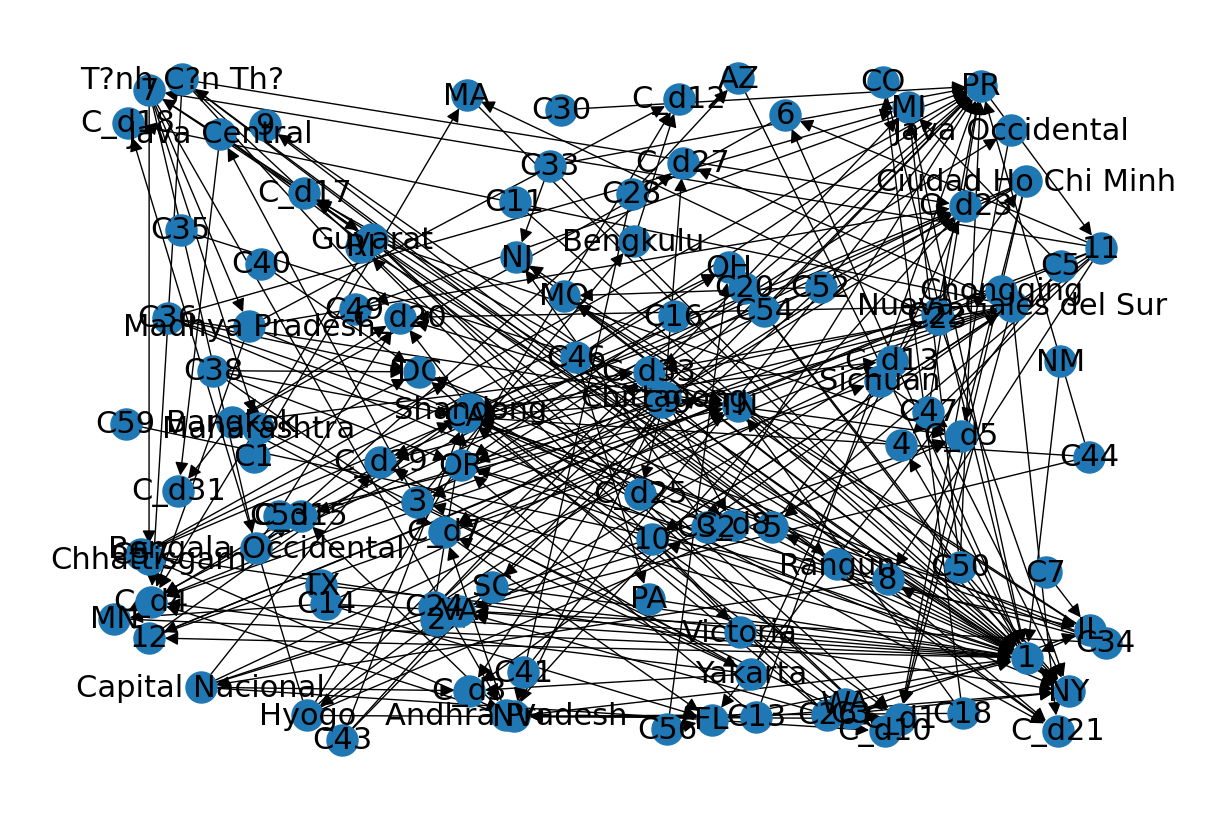

In [273]:
A_L = list(A_cost.keys())

# G2 = nx.DiGraph()
G2 = nx.DiGraph()
G2.add_edges_from(A_L)
plt.figure(figsize=(12, 8))

pos2 = nx.random_layout(G2)
nx.draw_random(G2, with_labels=True, node_size=500, font_size=22, arrowsize=20)


# legend_text = "\n".join([f"{row['Código']}: {row['País']}" for _, row in df_mapping.sort_values('Código').iterrows()])
# plt.text(1.05, 0.7, legend_text, transform=plt.gca().transAxes, fontsize=22,
#          verticalalignment='center', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
# plt.title("Grafo entre pedidos e clientes", fontsize=22)
# plt.savefig("grafo_pedidos_clientes2.png", dpi=400, bbox_inches='tight')
plt.show()

In [274]:
A_cost_new = {key: -abs(val) for key, val in A_cost.items()}
A_cost_new


{(1, 2): -32.36293293995371,
 (1, 3): -18.23216124247611,
 (1, 4): -27.785366291207072,
 (1, 5): -13.771538009857776,
 (1, 6): -4.747513374125001,
 (1, 7): -23.941872441145264,
 (1, 8): -19.378333064761904,
 (1, 9): -52.906251102750005,
 (1, 10): -23.591382009911904,
 (11, 8): -19.378333064761904,
 (11, 7): -23.941872441145264,
 (11, 12): -2.6012677268875812,
 (11, 10): -23.591382009911904,
 (11, 4): -27.785366291207072,
 (1, 12): -2.6012677268875812,
 (11, 3): -18.23216124247611,
 (11, 5): -13.771538009857776,
 (11, 6): -4.747513374125001,
 ('MA', 1): -20.870231599583512,
 ('CA', 1): -20.870231599583512,
 ('FL', 1): -20.870231599583512,
 ('IL', 1): -20.870231599583512,
 ('NV', 1): -20.870231599583512,
 ('NY', 1): -20.870231599583512,
 ('TN', 1): -20.870231599583512,
 ('OR', 1): -20.870231599583512,
 ('CO', 1): -20.870231599583512,
 ('MN', 1): -20.870231599583512,
 ('MI', 1): -20.870231599583512,
 ('RI', 1): -20.870231599583512,
 ('AZ', 1): -20.870231599583512,
 ('PR', 11): -14.0818112

In [275]:
tuplas = list(A_cost.keys())

N = set()
for a, b in tuplas:
    N.add(a)
    N.add(b)



In [285]:
d, p = BellmanFord(N, list(A_cost.keys()), A_cost_new, 'C_d3')
novo_dicionario = {k: v for k, v in d.items() if v is not None}

In [283]:
p

{'Bengala Occidental': None,
 1: None,
 2: None,
 3: None,
 4: None,
 5: None,
 6: None,
 7: None,
 8: None,
 9: None,
 10: None,
 11: None,
 12: None,
 'MI': None,
 'Sichuan': None,
 'Chongqing': None,
 'C59': None,
 'NJ': None,
 'C38': None,
 'Chhattisgarh': None,
 'C46': None,
 'Capital Nacional': None,
 'OH': None,
 'SC': None,
 'Maharashtra': None,
 'C33': None,
 'C14': None,
 'CA': None,
 'C30': None,
 'C47': None,
 'C44': None,
 'Bengkulu': None,
 'C34': None,
 'C_d23': None,
 'Hyogo': None,
 'NV': None,
 'C20': None,
 'C9': None,
 'C52': None,
 'Java Occidental': None,
 'C_d20': None,
 'C54': None,
 'C7': None,
 'VA': None,
 'C_d17': None,
 'Rangún': None,
 'C28': None,
 'Victoria': None,
 'AZ': None,
 'C56': None,
 'NM': None,
 'C_d8': None,
 'TN': None,
 'NY': None,
 'C_d1': None,
 'T?nh C?n Th?': None,
 'C3': None,
 'Madhya Pradesh': None,
 'Bangkok': None,
 'C24': None,
 'C11': None,
 'C_d4': None,
 'C5': None,
 'C_d3': None,
 'TX': None,
 'IL': None,
 'PA': None,
 'C_d13':